# Regression

In [18]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [19]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [20]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
   
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

In [21]:
net = Net(n_feature=1, n_hidden=50, n_output=1)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_fun = torch.nn.MSELoss()
plt.ion()

Net(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


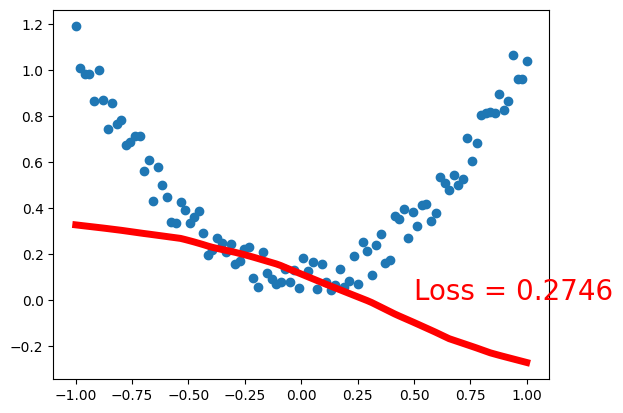

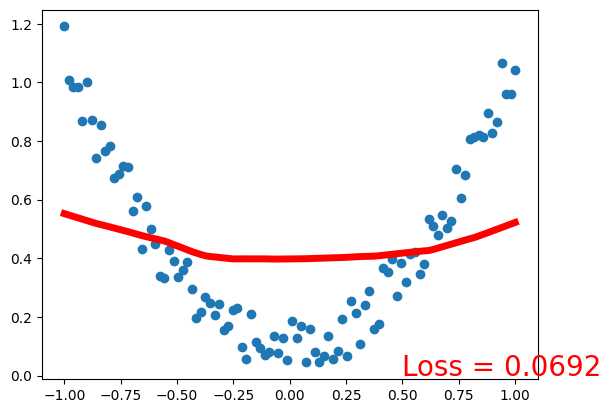

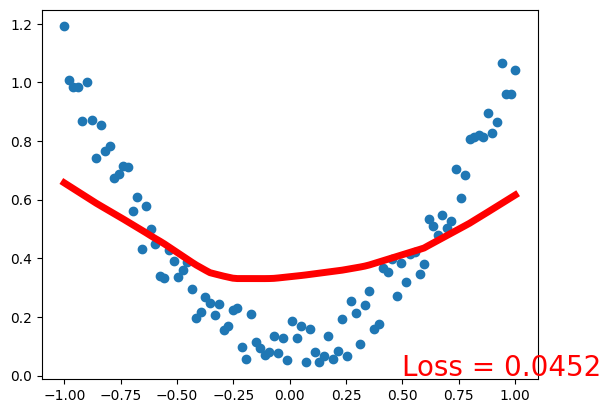

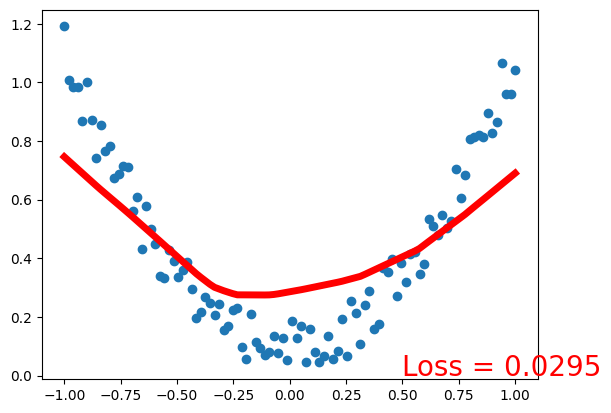

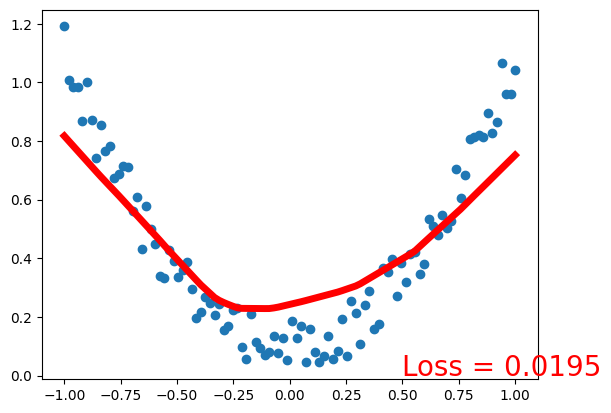

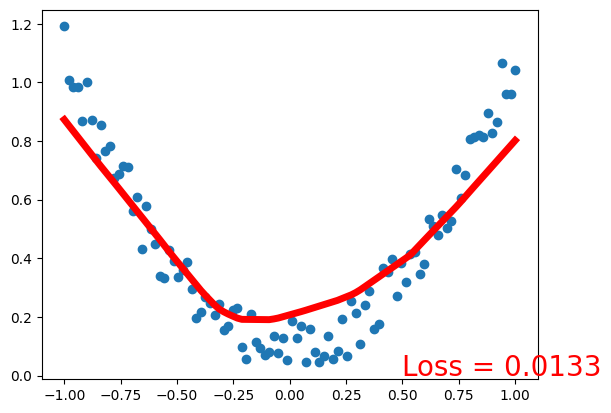

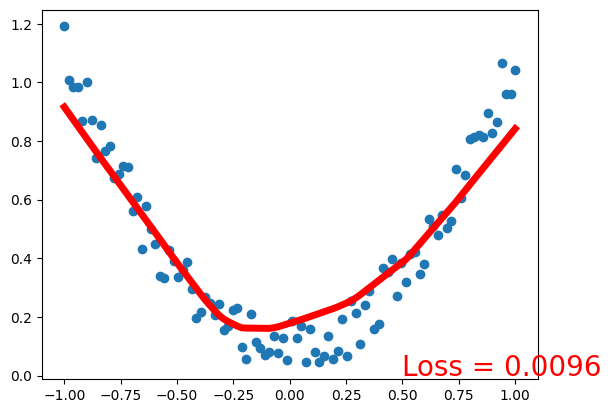

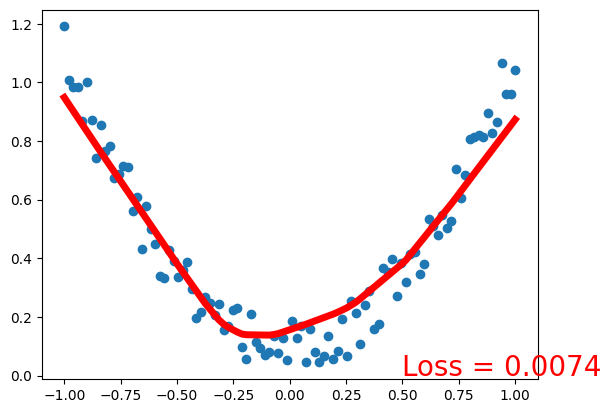

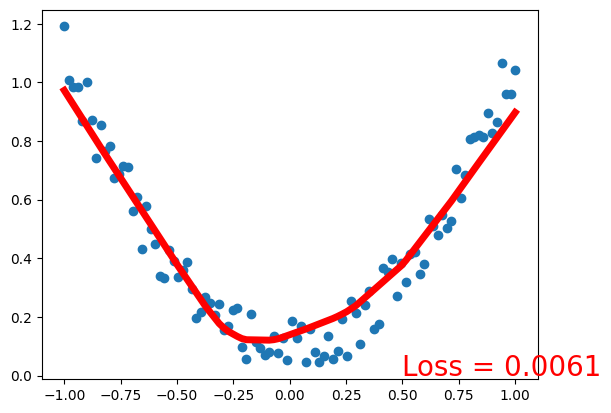

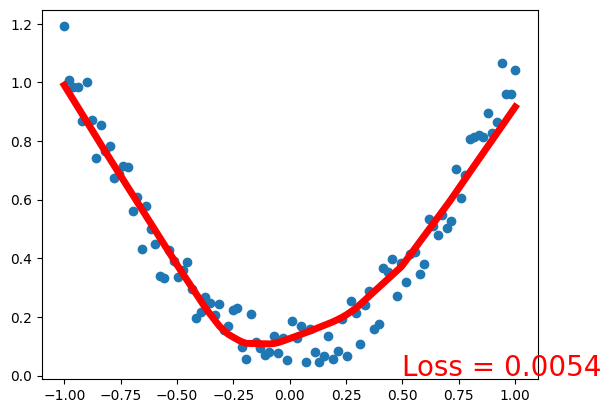

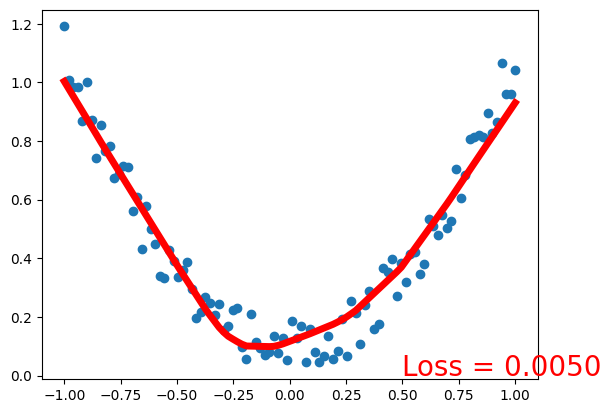

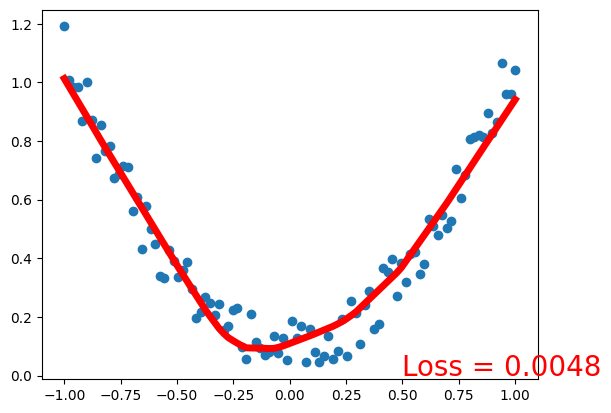

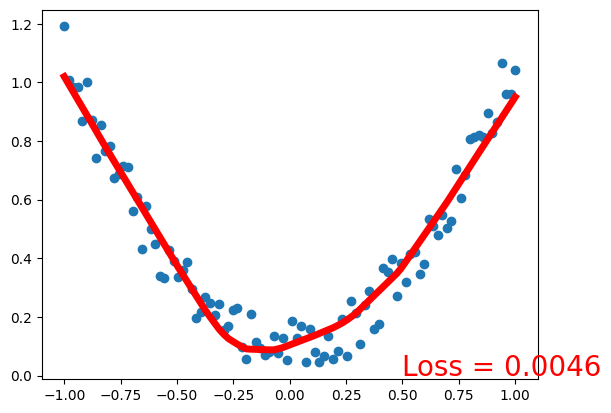

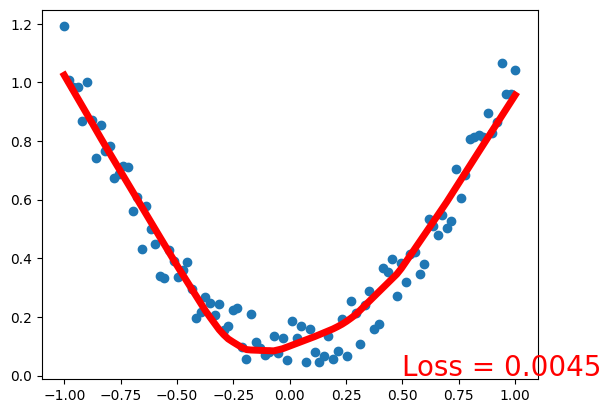

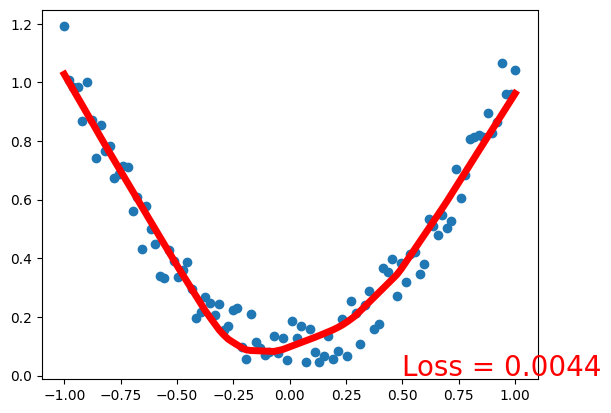

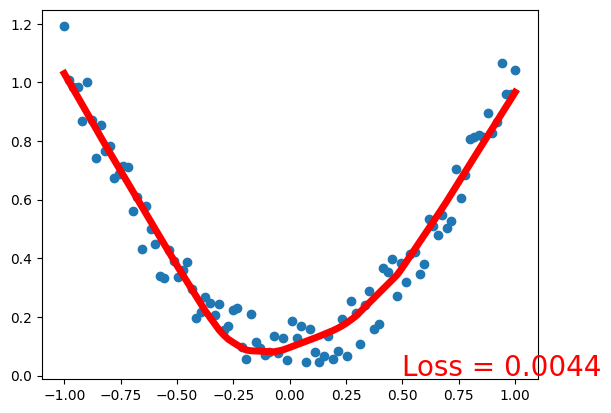

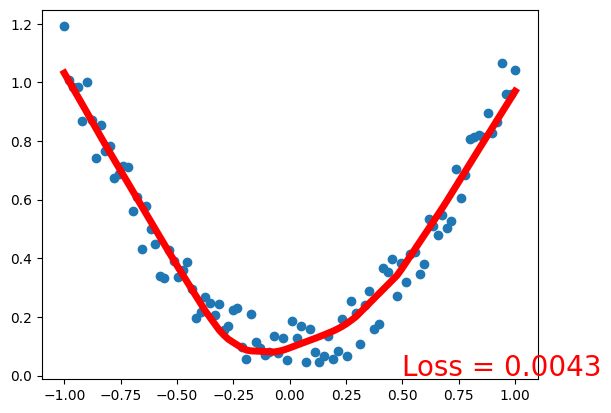

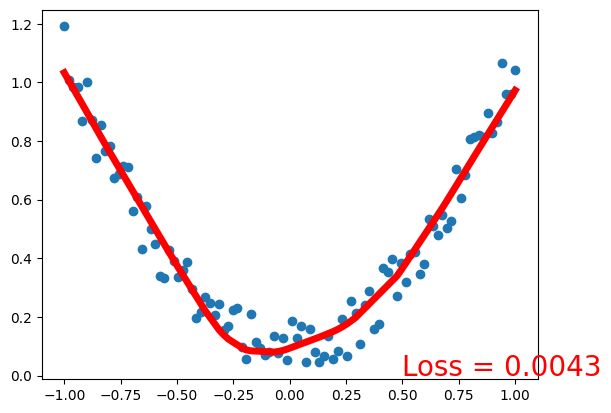

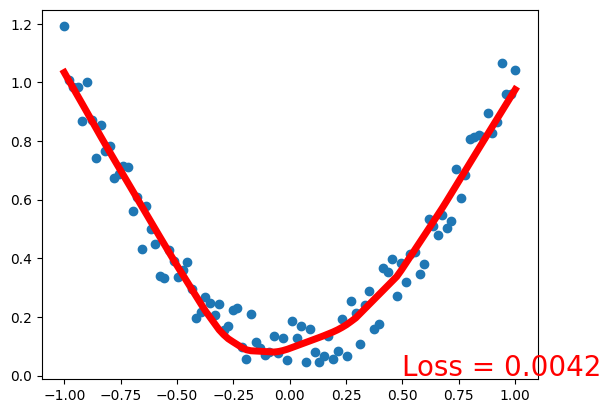

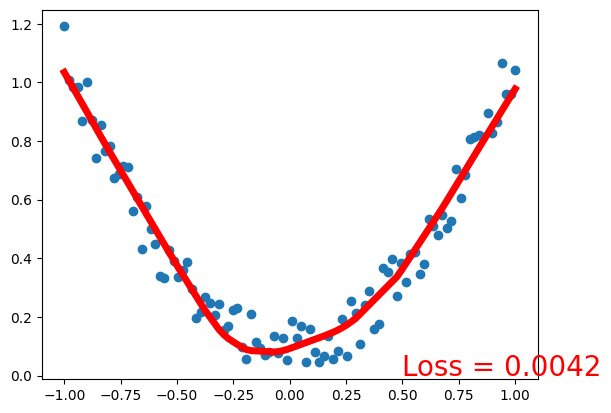

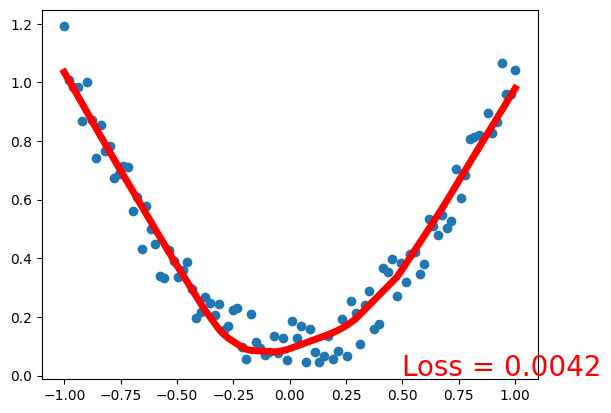

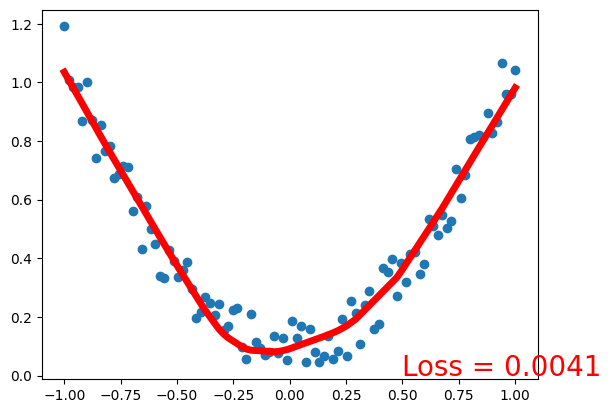

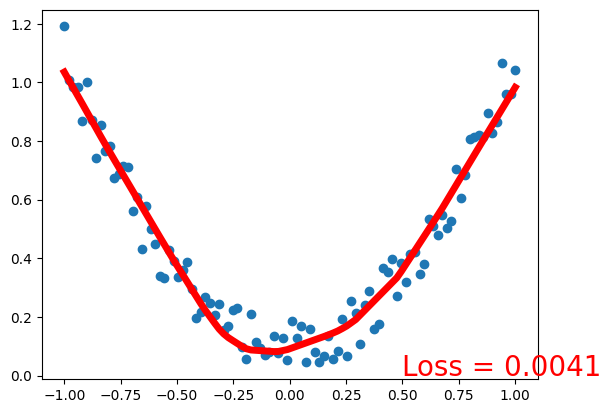

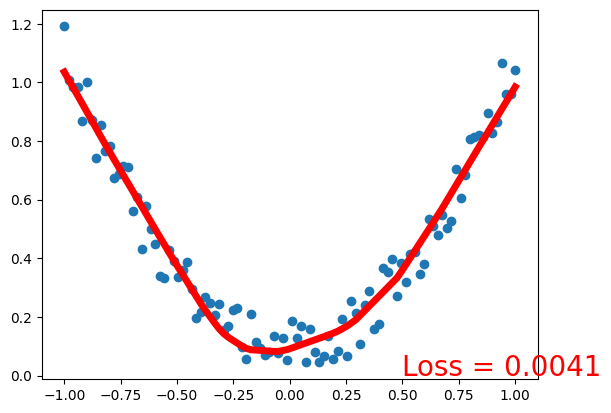

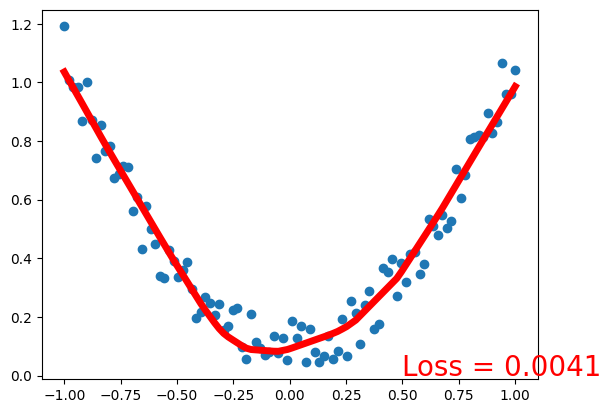

In [22]:
# Training
for t in range(500):
    prediction = net(x)
    loss = loss_fun(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()